In [1]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
import warnings
warnings.filterwarnings('ignore')

C:\ProgramData\Anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


## Data Transaksi

In [2]:
data_transaksi = pd.read_csv("data/Case Study - Transaction.csv", sep=';')

In [3]:
data_transaksi.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,01/01/2022,P3,7500,4,30000,12
1,TR16356,165,01/01/2022,P9,10000,7,70000,1
2,TR1984,183,01/01/2022,P1,8800,4,35200,4
3,TR35256,160,01/01/2022,P1,8800,7,61600,4
4,TR41231,386,01/01/2022,P9,10000,1,10000,4


In [4]:
data_transaksi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TransactionID  5020 non-null   object
 1   CustomerID     5020 non-null   int64 
 2   Date           5020 non-null   object
 3   ProductID      5020 non-null   object
 4   Price          5020 non-null   int64 
 5   Qty            5020 non-null   int64 
 6   TotalAmount    5020 non-null   int64 
 7   StoreID        5020 non-null   int64 
dtypes: int64(5), object(3)
memory usage: 313.9+ KB


In [5]:
data_transaksi['Date'] = pd.to_datetime(data_transaksi['Date'])

In [6]:
data_transaksi.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5020 entries, 0 to 5019
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   TransactionID  5020 non-null   object        
 1   CustomerID     5020 non-null   int64         
 2   Date           5020 non-null   datetime64[ns]
 3   ProductID      5020 non-null   object        
 4   Price          5020 non-null   int64         
 5   Qty            5020 non-null   int64         
 6   TotalAmount    5020 non-null   int64         
 7   StoreID        5020 non-null   int64         
dtypes: datetime64[ns](1), int64(5), object(2)
memory usage: 313.9+ KB


In [7]:
data_transaksi.head()

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID
0,TR11369,328,2022-01-01,P3,7500,4,30000,12
1,TR16356,165,2022-01-01,P9,10000,7,70000,1
2,TR1984,183,2022-01-01,P1,8800,4,35200,4
3,TR35256,160,2022-01-01,P1,8800,7,61600,4
4,TR41231,386,2022-01-01,P9,10000,1,10000,4


In [8]:
data_transaksi.isnull().sum()

TransactionID    0
CustomerID       0
Date             0
ProductID        0
Price            0
Qty              0
TotalAmount      0
StoreID          0
dtype: int64

In [9]:
data_transaksi['ProductID'].value_counts()

P5     814
P10    620
P2     530
P7     522
P3     519
P9     488
P8     485
P1     397
P4     390
P6     255
Name: ProductID, dtype: int64

## Data Product

In [8]:
data_product = pd.read_csv("data/Case Study - Product.csv", sep=';')

In [9]:
data_product

,ProductID,Product Name,Price
0,P1,Choco Bar,8800
1,P2,Ginger Candy,3200
2,P3,Crackers,7500
3,P4,Potato Chip,12000
4,P5,Thai Tea,4200
5,P6,Cashew,18000
6,P7,Coffee Candy,9400
7,P8,Oat,16000
8,P9,Yoghurt,10000
9,P10,Cheese Stick,15000


macam-macam cara:
    
- df_inventory = data_transaksi.merge(data_product, on='ProductID', how='left')
- df_inventory = data_transaksi.merge(data_product, on='ProductID', how='inner')
- df_inventory = data_transaksi.merge(data_product)
- df_inventory = data_transaksi.merge(data_product, on=['ProductID', 'price'], how='left')


## Data Merge

In [122]:
df_inventory = data_transaksi.merge(data_product)
df_inventory.head(10)

,TransactionID,CustomerID,Date,ProductID,Price,Qty,TotalAmount,StoreID,Product Name
0,TR11369,328,2022-01-01,P3,7500,4,30000,12,Crackers
1,TR14355,203,2022-02-01,P3,7500,4,30000,10,Crackers
2,TR16534,421,2022-02-01,P3,7500,2,15000,14,Crackers
3,TR10346,322,2022-03-01,P3,7500,4,30000,4,Crackers
4,TR36491,117,2022-03-01,P3,7500,4,30000,12,Crackers
5,TR45980,7,2022-03-01,P3,7500,3,22500,7,Crackers
6,TR64821,117,2022-04-01,P3,7500,1,7500,2,Crackers
7,TR40523,176,2022-06-01,P3,7500,4,30000,2,Crackers
8,TR77963,116,2022-06-01,P3,7500,2,15000,7,Crackers
9,TR4331,335,2022-08-01,P3,7500,3,22500,12,Crackers


In [14]:
df_inventory['ProductID'].unique()

array(['P3', 'P9', 'P1', 'P10', 'P8', 'P5', 'P7', 'P4', 'P2', 'P6'],
      dtype=object)

In [13]:
df_inventory['ProductID'].value_counts()

P5     814
P10    620
P2     530
P7     522
P3     519
P9     488
P8     485
P1     397
P4     390
P6     255
Name: ProductID, dtype: int64

In [130]:
df_product = df_inventory.groupby(by=['Product Name']).sum()[['Qty']].sort_values(by='Qty')
df_product

,Qty
Product Name,
Cashew,627
Oat,965
Potato Chip,1092
Crackers,1824
Cheese Stick,1841
Yoghurt,1963
Coffee Candy,2097
Choco Bar,2408
Ginger Candy,2626


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9],
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

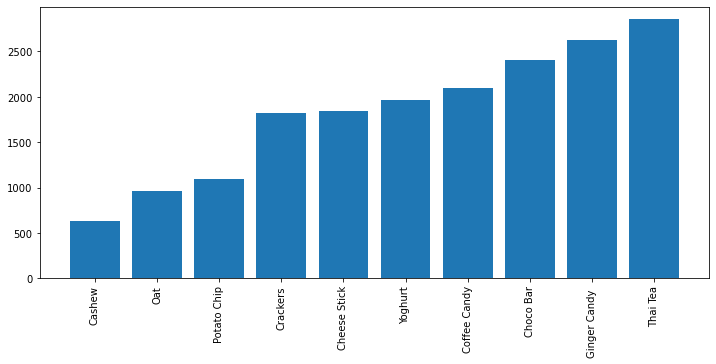

In [132]:
plt.figure(figsize=(12,5))
plt.bar(df_product.index, df_product['Qty'])
plt.xticks(rotation=90)

## Data Agregasi

In [89]:
df_inventory.describe()

,CustomerID,Price,Qty,TotalAmount,StoreID
count,5020.000000,5020.000000,5020.000000,5020.000000,5020.000000
mean,221.263745,9684.800797,3.644622,32279.482072,7.489841
std,129.672955,4600.708780,1.855295,19675.462455,4.028502
min,1.000000,3200.000000,1.000000,7500.000000,1.000000
25%,108.000000,4200.000000,2.000000,16000.000000,4.000000
50%,221.000000,9400.000000,3.000000,28200.000000,7.000000
75%,332.000000,15000.000000,5.000000,47000.000000,11.000000
max,447.000000,18000.000000,10.000000,88000.000000,14.000000


In [12]:
df = df_inventory.groupby(by=['Date']).sum()[['Qty']]

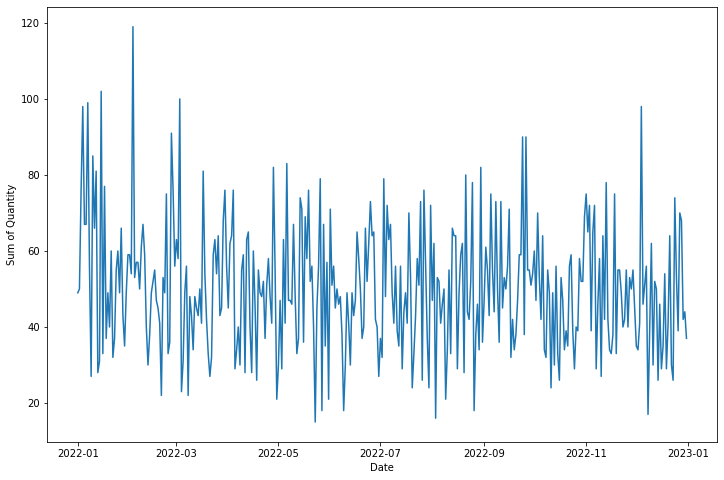

In [14]:
plt.figure(figsize=(12,8))
plt.xlabel('Date')
plt.ylabel('Sum of Quantity')
plt.plot(df)

## ADF Test

> Menentukan apakah deret waktu tertentu stasioner.

Mengecek stasioneritas data dengan menggunakan Augmented Dickey-Fuller (ADF) test adalah salah satu metode yang umum digunakan. ADF test adalah tes hipotesis yang digunakan untuk menguji keberadaan akar unit dalam deret waktu. Akar unit menunjukkan bahwa data tersebut tidak stasioner.

In [15]:
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [16]:
time_series = df['Qty']

In [17]:
time_series

Date
2022-01-01    49
2022-01-02    50
2022-01-03    76
2022-01-04    98
2022-01-05    67
              ..
2022-12-27    70
2022-12-28    68
2022-12-29    42
2022-12-30    44
2022-12-31    37
Name: Qty, Length: 365, dtype: int64

In [18]:
result = adfuller(time_series)

In [19]:
result

(-19.01878280229973,
 0.0,
 0,
 364,
 {'1%': -3.4484434475193777,
  '5%': -2.869513170510808,
  '10%': -2.571017574266393},
 2908.7446297448805)

In [20]:
print('ADF Statistic:', result[0])
print('p-value:', result[1])
print('Critical Values:')
for key, value in result[4].items():
    print(key, ':', value)

ADF Statistic: -19.01878280229973
p-value: 0.0
Critical Values:
1% : -3.4484434475193777
5% : -2.869513170510808
10% : -2.571017574266393


Pada hasil ADF test, ada beberapa elemen yang penting:

- ADF Statistic: Nilai ini adalah statistik uji ADF yang digunakan untuk membandingkan dengan nilai kritis untuk mengambil keputusan apakah data stasioner atau tidak. Semakin negatif nilainya, semakin kuat bukti bahwa data tersebut stasioner.
- p-value: Ini adalah nilai probabilitas yang menunjukkan seberapa kuat bukti melawan hipotesis nol bahwa data tersebut memiliki akar unit (tidak stasioner). Nilai p-value yang rendah (lebih rendah dari tingkat signifikansi yang ditentukan) menunjukkan bahwa data tersebut stasioner.
- Critical Values: Ini adalah nilai-nilai kritis yang digunakan untuk membandingkan ADF Statistic. Jika ADF Statistic lebih negatif dari nilai kritis yang sesuai, maka kita dapat menolak hipotesis nol dan menyimpulkan bahwa data tersebut stasioner.

Jika p-value lebih kecil dari tingkat signifikansi yang telah ditentukan (misalnya, 0.05), dan ADF Statistic lebih negatif dari nilai kritis yang sesuai, maka kita dapat menyimpulkan bahwa data tersebut stasioner. Jika p-value lebih besar dari tingkat signifikansi, atau ADF Statistic tidak cukup negatif, maka kita gagal menolak hipotesis nol dan menyimpulkan bahwa data tersebut tidak stasioner.


## Compare model with different orde

## Train Test Data

In [50]:
from sklearn.model_selection import train_test_split

# Memisahkan data menjadi training dan testing
train_data, test_data = train_test_split(time_series, test_size=0.2, shuffle=False)
train_data

Date
2022-01-01    49
2022-01-02    50
2022-01-03    76
2022-01-04    98
2022-01-05    67
              ..
2022-10-15    33
2022-10-16    26
2022-10-17    53
2022-10-18    47
2022-10-19    34
Name: Qty, Length: 292, dtype: int64

## Determine Three Parameter ARIMA

Untuk menentukan tiga parameter ARIMA (p, d, q), berikut adalah beberapa langkah yang dapat Anda ikuti:

- Orde Differencing (d): Langkah pertama adalah menentukan orde differencing yang diperlukan untuk membuat data stasioner. Orde differencing mengacu pada jumlah kali yang diperlukan untuk mengurangi tren atau pola musiman dalam data. Anda dapat menggunakan ACF plot atau ADF test untuk membantu menentukan orde differencing. Jika data Anda sudah stasioner, maka orde differencing (d) akan menjadi 0.

- Orde Autoregressive (p): Setelah Anda mendapatkan data differenced, Anda dapat menggunakan plot PACF (Partial Autocorrelation Function) untuk membantu menentukan orde autoregressive (p). PACF menunjukkan korelasi langsung antara nilai sekarang dengan nilai-nilai sebelumnya dalam deret waktu. Jika nilai PACF signifikan di lag-lag sebelumnya dan kemudian menurun secara bertahap, maka itu menunjukkan ada orde autoregressive yang mungkin. Anda dapat memilih nilai p berdasarkan lag terakhir yang signifikan sebelum nilai mulai menurun secara bertahap.

- Orde Moving Average (q): Setelah Anda menentukan orde autoregressive, Anda dapat menggunakan plot ACF (Autocorrelation Function) untuk membantu menentukan orde moving average (q). ACF menunjukkan korelasi langsung antara nilai sekarang dengan nilai-nilai sebelumnya dalam deret waktu, termasuk korelasi akibat moving average. Jika nilai ACF signifikan di lag-lag sebelumnya dan kemudian menurun secara bertahap, maka itu menunjukkan ada orde moving average yang mungkin. Anda dapat memilih nilai q berdasarkan lag terakhir yang signifikan sebelum nilai mulai menurun secara bertahap

### Orde Differencing (d)
Jika data Anda sudah stasioner, maka orde differencing (d) akan menjadi 0.

### Orde Autoregressive (p)

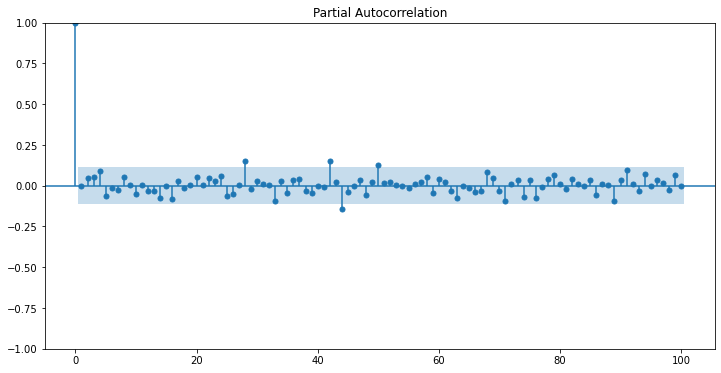

In [51]:
fig, ax = plt.subplots(figsize=(12,6))
plot_pacf(train_data, ax = ax, lags=100)
plt.show()

## Orde MA (Moving Average) (q)

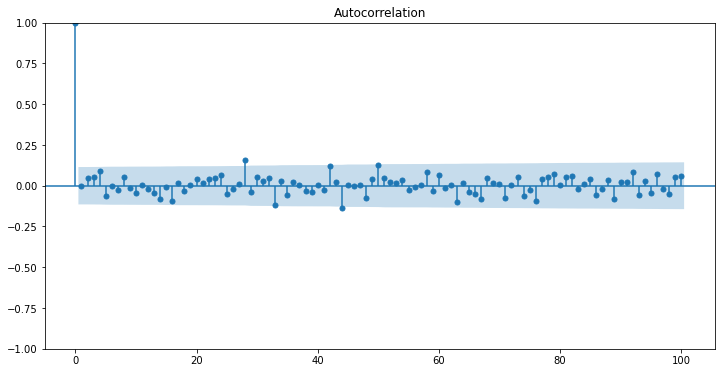

In [52]:
fig, ax = plt.subplots(figsize=(12,6))
plot_acf(train_data, ax = ax, lags=100)
plt.show()

## Model ARIMA

Informasi model:

- Model: Menunjukkan jenis model yang digunakan, dalam hal ini adalah ARIMA.
- Method: Menunjukkan metode yang digunakan untuk memperoleh model ARIMA.
- Date: Menunjukkan tanggal dan waktu ketika model ARIMA dibangun.
- Time: Menunjukkan waktu yang diperlukan untuk membangun model.

Statistik Keselarasan:

- Log Likelihood: Menunjukkan nilai log-likelihood dari model ARIMA. Semakin tinggi nilai ini, semakin baik model cocok dengan data.
- AIC (Akaike Information Criterion): Merupakan metrik penilaian yang mengukur kualitas relatif dari model. Semakin rendah nilai AIC, semakin baik modelnya.
- BIC (Bayesian Information Criterion): Merupakan metrik penilaian lain yang serupa dengan AIC, dengan penalti lebih tinggi untuk model yang lebih kompleks. Anda ingin mencari nilai BIC yang lebih rendah.

Koefisien:

- coef: Menunjukkan nilai koefisien dari setiap komponen dalam model ARIMA (autoregressive, differencing, moving average).
- std err: Menunjukkan kesalahan standar dari setiap koefisien.
- t: Menunjukkan nilai t-statistic untuk menguji apakah koefisien secara signifikan berbeda dari nol.
- P>|t|: Menunjukkan nilai p-value terkait dengan t-statistic. Jika nilai p-value kurang dari tingkat signifikansi yang ditentukan (misalnya 0.05), maka koefisien dianggap signifikan secara statistik.
[0.025 0.975]: Menunjukkan interval kepercayaan 95% untuk setiap koefisien.

In [31]:
def model_ts(data, p,d,q):
    model = ARIMA(data, order=[p,d,q])
    model_fit = model.fit()
    
    return model_fit

## Model 1

In [53]:
model_1 = model_ts(train_data, 28,0,28) 

In [33]:
model_1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                    Qty   No. Observations:                  292
Model:               ARIMA(28, 0, 28)   Log Likelihood               -1210.274
Date:                Thu, 27 Jul 2023   AIC                           2536.547
Time:                        16:02:41   BIC                           2749.799
Sample:                    01-01-2022   HQIC                          2621.967
                         - 10-19-2022                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         50.6849      3.009     16.845      0.000      44.787      56.582
ar.L1          0.1141      0.494      0.231      0.817      -0.853       1.081
ar.L2          0.3572      0.509      0.702      0.483      -0.641       1.355
ar.L3          0.1184      0.449      0.264      0.792      -0.761       0.998
ar.L4         -0.0657      0.429     -0.153      0.878      -0.907       0.776
ar.L5         -0.3287      0.339     -0.969      0.333      -0.993       0.336
ar.L6         -0.0316      0.292     -0.108      0.914      -0.604       0.540
ar.L7          0.3682      0.312      1.178      0.239      -0.244       0.981
ar.L8          0.1508      0.371      0.406      0.685      -0.577       0.878
ar.L9         -0.1720      0.398     -0.432      0.666      -0.952       0.608
ar.L10        -0.3035      0.344     -0.883      0.377      -0.977       0.370
ar.L11        -0.1749      0.370     -0.473      0.636      -0.899       0.550
ar.L12         0.3907      0.344      1.136      0.256      -0.283       1.065
ar.L13         0.0146      0.223      0.065      0.948      -0.422       0.451
ar.L14         0.0858      0.190      0.452      0.651      -0.286       0.458
ar.L15        -0.0887      0.196     -0.453      0.650      -0.472       0.295
ar.L16        -0.5140      0.218     -2.355      0.019      -0.942      -0.086
ar.L17         0.0903      0.367      0.246      0.806      -0.629       0.810
ar.L18         0.1998      0.354      0.565      0.572      -0.494       0.893
ar.L19         0.4369      0.320      1.364      0.173      -0.191       1.065
ar.L20        -0.0983      0.439     -0.224      0.823      -0.959       0.763
ar.L21        -0.3807      0.373     -1.020      0.308      -1.112       0.351
ar.L22         0.2414      0.283      0.854      0.393      -0.313       0.796
ar.L23         0.2184      0.335      0.651      0.515      -0.439       0.875
ar.L24         0.1339      0.358      0.375      0.708      -0.567       0.835
ar.L25        -0.1393      0.385     -0.362      0.717      -0.893       0.615
ar.L26        -0.3098      0.402     -0.771      0.441      -1.098       0.478
ar.L27        -0.1165      0.391     -0.298      0.766      -0.883       0.650
ar.L28         0.7062      0.388      1.819      0.069      -0.055       1.467
ma.L1         -0.1373      0.534     -0.257      0.797      -1.184       0.909
ma.L2         -0.2718      0.639     -0.425      0.671      -1.525       0.981
ma.L3         -0.0725      0.502     -0.144      0.885      -1.056       0.911
ma.L4          0.0706      0.597      0.118      0.906      -1.099       1.241
ma.L5          0.3056      0.523      0.585      0.559      -0.719       1.330
ma.L6          0.0296      0.540      0.055      0.956      -1.029       1.089
ma.L7         -0.3993      0.655     -0.609      0.542      -1.683       0.885
ma.L8         -0.1492      0.513     -0.291      0.771      -1.154       0.856
ma.L9          0.1960      0.723      0.271      0.786      -1.221       1.613
ma

In [54]:
predict_train = pd.DataFrame(model_1.predict())
predict_train

,predicted_mean
2022-01-01,50.684873
2022-01-02,50.684893
2022-01-03,50.620582
2022-01-04,50.493843
2022-01-05,50.968014
...,...
2022-10-15,40.929366
2022-10-16,43.884373
2022-10-17,54.613482
2022-10-18,56.329865


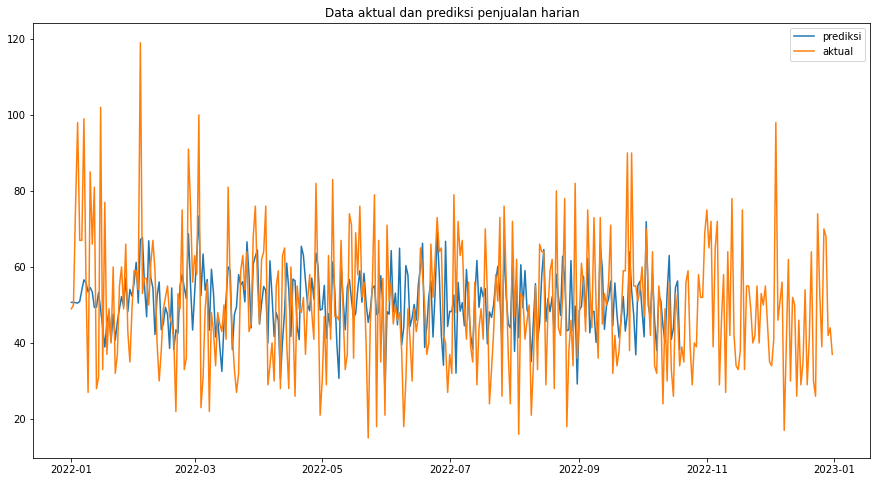

In [55]:
plt.figure(figsize=(15,8))
plt.plot(predict_train['predicted_mean'], label='prediksi')
plt.plot(df, label='aktual')
# plt.plot(test_data, label='testing')
plt.title('Data aktual dan prediksi penjualan harian')
plt.legend()
plt.show()

In [56]:
actual_value = train_data
predicted_values = model_1.predict()
mse_train = mean_squared_error(actual_value, predicted_values)
print("MSE:", mse_train)

MSE: 237.98997791921872


In [57]:
rmse_train = np.sqrt(mse_train)
print("RMSE:", rmse_train)

RMSE: 15.42692379961795


In [92]:
model_predict = pd.DataFrame(model_fit.predict())

In [93]:
model_predict

,predicted_mean
2022-01-01,50.131190
2022-01-02,50.118824
2022-01-03,50.123386
2022-01-04,50.284354
2022-01-05,50.646078
...,...
2022-12-27,54.243491
2022-12-28,45.909556
2022-12-29,48.669030
2022-12-30,52.310699


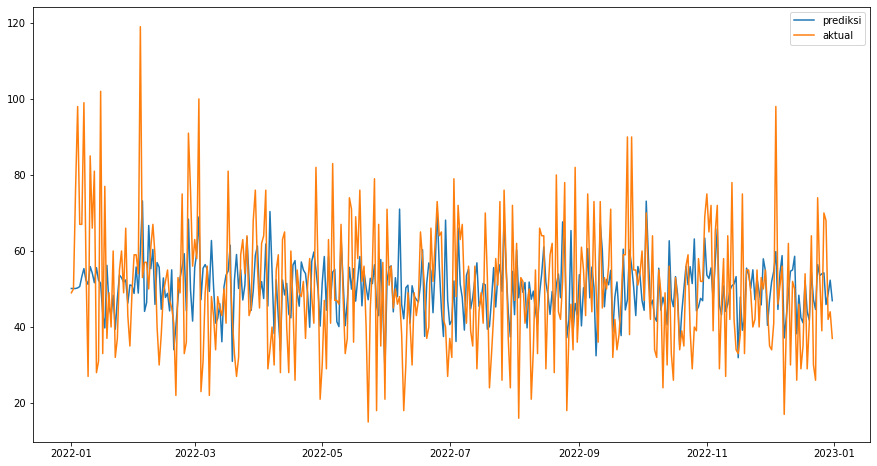

In [103]:
plt.figure(figsize=(15,8))
plt.plot(model_predict['predicted_mean'], label='prediksi')
plt.plot(time_series, label='aktual')
# plt.title('Data aktual dan prediksi traffic source FB')
plt.legend()
plt.show()

In [42]:
forecast_steps = len(test_data)
forecast = model_1.forecast(steps=forecast_steps)

In [44]:
forecast

2022-10-20    42.740584
2022-10-21    52.612709
2022-10-22    54.965399
2022-10-23    56.470228
2022-10-24    58.784078
                ...    
2022-12-27    46.776354
2022-12-28    43.600212
2022-12-29    45.079791
2022-12-30    47.827051
2022-12-31    42.787592
Freq: D, Name: predicted_mean, Length: 73, dtype: float64

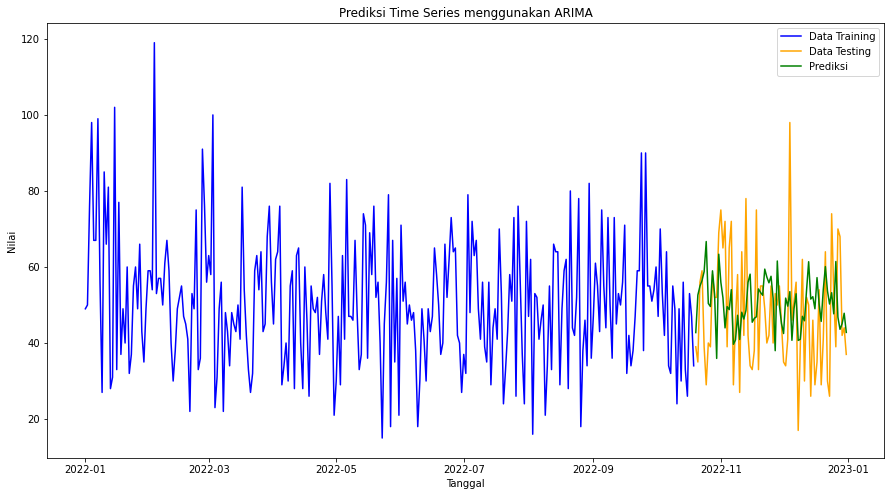

In [59]:
plt.figure(figsize=(15,8))

# Plot data training
plt.plot(train_data.index, train_data.values, label='Data Training', color='blue')

# Plot data testing
plt.plot(test_data.index, test_data.values, label='Data Testing', color='orange')

# Plot hasil prediksi
# forecast_range = pd.date_range(start=test_data.index[0], periods=forecast_steps, freq='MS')
plt.plot(test_data.index, forecast, label='Prediksi', color='green')

plt.xlabel('Tanggal')
plt.ylabel('Nilai')
plt.title('Prediksi Time Series menggunakan ARIMA')
plt.legend()
plt.show()

## Model 2

In [61]:
model_2 = model_ts(train_data, 44,0,42) 

In [62]:
predict_train_2 = pd.DataFrame(model_2.predict())
predict_train_2

,predicted_mean
2022-01-01,50.670684
2022-01-02,50.662958
2022-01-03,50.549660
2022-01-04,50.490079
2022-01-05,51.680199
...,...
2022-10-15,36.015833
2022-10-16,42.793851
2022-10-17,44.713490
2022-10-18,62.788101


In [65]:
actual_value = train_data
predicted_values_2 = model_2.predict()
mse_train_2 = mean_squared_error(actual_value, predicted_values_2)
print("MSE:", mse_train_2)

MSE: 212.75778015685427


In [66]:
rmse_train_2 = np.sqrt(mse_train_2)
print("RMSE:", rmse_train_2)

RMSE: 14.586218843718692


In [70]:
forecast_steps = len(test_data)
forecast_2 = model_2.forecast(steps=forecast_steps)

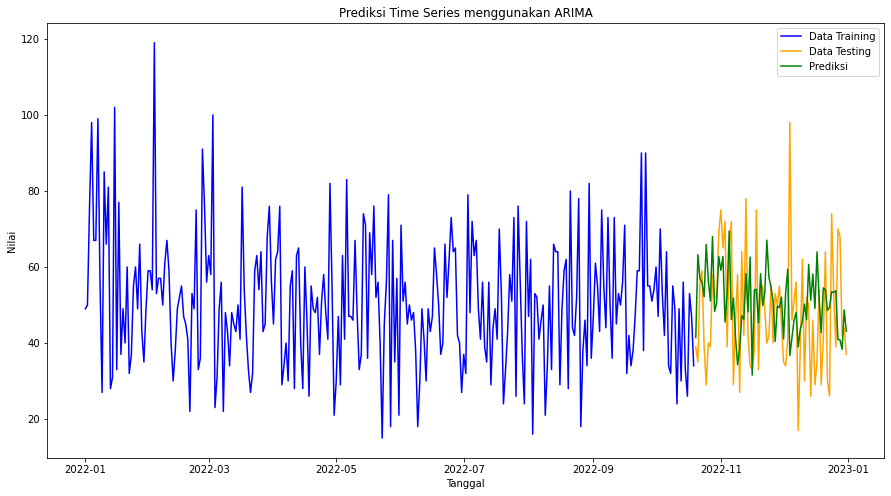

In [72]:
plt.figure(figsize=(15,8))

# Plot data training
plt.plot(train_data.index, train_data.values, label='Data Training', color='blue')

# Plot data testing
plt.plot(test_data.index, test_data.values, label='Data Testing', color='orange')

# Plot hasil prediksi
# forecast_range = pd.date_range(start=test_data.index[0], periods=forecast_steps, freq='MS')
plt.plot(test_data.index, forecast_2, label='Prediksi', color='green')

plt.xlabel('Tanggal')
plt.ylabel('Nilai')
plt.title('Prediksi Time Series menggunakan ARIMA')
plt.legend()
plt.show()

## Model 3

In [80]:
model_3 = model_ts(train_data, 50,0,44) 

In [81]:
predict_train_3 = pd.DataFrame(model_3.predict())
predict_train_3

,predicted_mean
2022-01-01,50.693595
2022-01-02,50.735733
2022-01-03,50.606872
2022-01-04,49.776863
2022-01-05,49.942549
...,...
2022-10-15,38.140321
2022-10-16,40.903850
2022-10-17,48.460951
2022-10-18,66.945711


In [82]:
actual_value = train_data
predicted_values_3 = model_3.predict()
mse_train_3 = mean_squared_error(actual_value, predicted_values_3)
print("MSE:", mse_train_3)

MSE: 211.9772780871955


In [83]:
rmse_train_3 = np.sqrt(mse_train_3)
print("RMSE:", rmse_train_3)

RMSE: 14.559439483963505


In [84]:
forecast_steps = len(test_data)
forecast_3 = model_3.forecast(steps=forecast_steps)

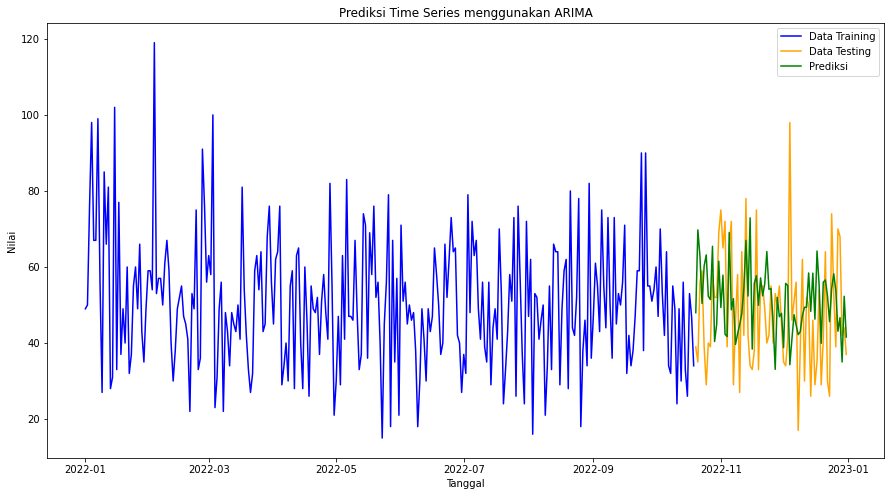

In [86]:
plt.figure(figsize=(15,8))

# Plot data training
plt.plot(train_data.index, train_data.values, label='Data Training', color='blue')

# Plot data testing
plt.plot(test_data.index, test_data.values, label='Data Testing', color='orange')

# Plot hasil prediksi
# forecast_range = pd.date_range(start=test_data.index[0], periods=forecast_steps, freq='MS')
plt.plot(test_data.index, forecast_3, label='Prediksi', color='green')

plt.xlabel('Tanggal')
plt.ylabel('Nilai')
plt.title('Prediksi Time Series menggunakan ARIMA')
plt.legend()
plt.show()

In [111]:
# Melakukan prediksi 10 hari ke depan setelah data testing
forecasted_data = model_3.forecast(steps=80)
forecasted_data

2022-10-20    47.985393
2022-10-21    69.743693
2022-10-22    62.872857
2022-10-23    50.394999
2022-10-24    60.239779
                ...    
2023-01-03    49.853454
2023-01-04    52.419215
2023-01-05    47.672810
2023-01-06    40.420492
2023-01-07    45.151513
Freq: D, Name: predicted_mean, Length: 80, dtype: float64

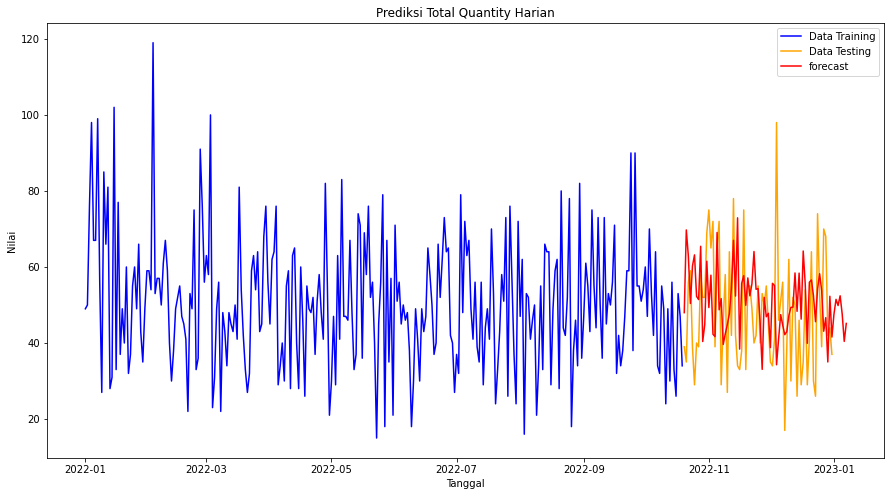

In [114]:
plt.figure(figsize=(15,8))

# Plot data training
plt.plot(train_data.index, train_data.values, label='Data Training', color='blue')

# Plot data testing
plt.plot(test_data.index, test_data.values, label='Data Testing', color='orange')

# Plot hasil prediksi
plt.plot(forecasted_data, label='forecast', color='red')

plt.xlabel('Tanggal')
plt.ylabel('Nilai')
plt.title('Prediksi Total Quantity Harian')
plt.legend()
plt.show()

Dari ketiga model yang telah di coba, model 3 merupakan model paling bagus